# Data Dictionary: Heart Disease Dataset

A detailed description of each variable in the `heart_disease.csv` dataset.

| Variable | Description | Type | Values / Range | Notes |
| :--- | :--- | :--- | :--- | :--- |
| **Age** | Age of the patient. | Numeric (Discrete) | `18` - `80` (years) |  |
| **Gender** | Biological sex of the patient. | Categorical (Nominal) | `Male`, `Female` |  |
| **Blood Pressure** | Systolic blood pressure reading. | Numeric (Continuous) | `~120` - `180` (mmHg) | A key indicator of hypertension. |
| **Cholesterol Level** | Total serum cholesterol level. | Numeric (Continuous) | `~150` - `300` (mg/dL) |  |
| **Exercise Habits** | Self-reported level of physical activity. | Categorical (Ordinal) | `Low`, `Medium`, `High` |  |
| **Smoking** | Current smoking status. | Categorical (Binary) | `Yes`, `No` |  |
| **Family Heart Disease** | Family history of heart disease. | Categorical (Binary) | `Yes`, `No` |  |
| **Diabetes** | Diagnosed diabetes status. | Categorical (Binary) | `Yes`, `No` |  |
| **BMI** | Body Mass Index. | Numeric (Continuous) | `~18` - `40` (kg/m²) | Calculated from weight and height. |
| **High Blood Pressure** | Diagnosis of hypertension. | Categorical (Binary) | `Yes`, `No` | May be correlated with the *Blood Pressure* reading. |
| **Low HDL Cholesterol** | Indicator of low High-Density Lipoprotein ("good" cholesterol). | Categorical (Binary) | `Yes`, `No` |  |
| **High LDL Cholesterol** | Indicator of high Low-Density Lipoprotein ("bad" cholesterol). | Categorical (Binary) | `Yes`, `No` |  |
| **Alcohol Consumption** | Self-reported level of alcohol intake. | Categorical (Ordinal) | `None`, `Low`, `Medium`, `High` |  |
| **Stress Level** | Self-reported level of stress. | Categorical (Ordinal) | `Low`, `Medium`, `High` |  |
| **Sleep Hours** | Self-reported average hours of sleep per night. | Numeric (Continuous) | `~4` - `10` (hours) |  |
| **Sugar Consumption** | Self-reported level of dietary sugar intake. | Categorical (Ordinal) | `Low`, `Medium`, `High` |  |
| **Triglyceride Level** | Level of triglycerides in the blood. | Numeric (Continuous) | `~100` - `400` (mg/dL) | A type of fat (lipid) found in your blood. |
| **Fasting Blood Sugar** | Level of glucose in the blood after fasting. | Numeric (Continuous) | `~80` - `160` (mg/dL) | Key indicator for diabetes and prediabetes. |
| **CRP Level** | C-Reactive Protein level, a marker of inflammation. | Numeric (Continuous) | `~0` - `15` (mg/L) | Higher levels indicate inflammation. |
| **Homocysteine Level** | Level of homocysteine, an amino acid. | Numeric (Continuous) | `~5` - `20` (µmol/L) | High levels are a risk factor for heart disease. |
| **Heart Disease Status** | Target variable. Presence of heart disease. | Categorical (Binary) | `No` | **Note:** All samples in this dataset are labeled `No`. This is likely a sample of healthy controls. |

---

### **Key Notes for Analysis:**
1.  **Missing Values:** The dataset contains missing values (e.g., blank cells, `NaN`). These will need to be handled (imputation, removal).
2.  **Target Variable:** The `Heart Disease Status` column only contains the value `"No"`. This means this specific file is a sample of **healthy individuals** (controls). To build a predictive model, you would need a corresponding dataset with `"Yes"` cases.
3.  **Unit Assumption:** Units (e.g., mg/dL, mmHg) are inferred based on standard medical ranges for these biomarkers.
4.  **Binary Variables:** All binary variables are encoded as strings `"Yes"`/`"No"`. These may need to be converted to integers (`1`/`0`) for machine learning models.

# Heart Disease Prediction - Comprehensive Analysis

## Project Overview
This notebook presents a comprehensive analysis of heart disease prediction using machine learning. The project includes:
- Exploratory Data Analysis (EDA)
- Data Preprocessing and Cleaning
- Feature Engineering
- Model Training with Hyperparameter Tuning
- Model Evaluation and Visualization
- Insights and Recommendations

**Dataset**: heart_disease.csv  
**Target Variable**: Heart Disease Status  
**Objective**: Build a predictive model to classify patients with heart disease


# 🫀 Heart Disease Prediction - Comprehensive Analysis & Model Optimization

## Advanced Machine Learning Pipeline with Hyperparameter Tuning

---

### 📋 Project Overview

This notebook presents a comprehensive analysis of heart disease prediction using **Random Forest Classification** with advanced hyperparameter optimization. The project includes:

- **Systematic hyperparameter tuning** using RandomizedSearchCV
- **Comprehensive model evaluation** across multiple metrics
- **Class imbalance handling** with optimized class weights
- **Feature importance analysis** and model interpretability
- **Production deployment** guidelines and templates

### 🎯 Key Objectives

1. **Optimize model performance** through comprehensive parameter tuning
2. **Handle class imbalance** effectively using class weight strategies
3. **Ensure model robustness** through validation curves and learning curves
4. **Provide actionable insights** for clinical decision support
5. **Create production-ready** deployment pipeline

### 📊 Expected Outcomes

- High-performance heart disease prediction model
- Detailed parameter optimization analysis
- Comprehensive model evaluation metrics
- Production deployment configuration

---

### 📚 Table of Contents

1. [Setup and Data Loading](#setup)
2. [Data Preprocessing](#preprocessing) 
3. [Comprehensive Hyperparameter Evaluation](#hyperparameter)
4. [Parameter Impact Analysis](#impact)
5. [Validation Curves Analysis](#validation)
6. [Class Weight Evaluation](#classweight)
7. [Final Model Performance](#performance)
8. [Learning Curves Analysis](#learning)
9. [Summary and Recommendations](#summary)
10. [Cross-Validation Stability](#stability)
11. [Feature Importance Analysis](#features)
12. [Model Comparison](#comparison)
13. [Error Analysis](#errors)
14. [Model Interpretability](#interpretability)
15. [Production Deployment Guide](#deployment)

---

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, validation_curve, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plot style for better visualization
plt.style.use('default')
sns.set_palette("husl")

## 1. Setup and Data Loading {#setup}

### 📦 Required Libraries

We'll import all necessary libraries for data processing, machine learning, and visualization:

- **Data Processing**: `pandas`, `numpy`
- **Machine Learning**: `scikit-learn` modules
- **Visualization**: `matplotlib`, `seaborn`
- **Statistical Analysis**: `scipy`
- **Model Persistence**: `joblib`

> **Note**: Ensure all required packages are installed before proceeding.

In [ ]:
# Load the balanced heart disease dataset
df = pd.read_csv('balanced_heart_disease.csv')  # Update path as needed

print(f"Dataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nTarget variable distribution:")
print(df['Heart Disease Status'].value_counts())

Loading and exploring the heart disease dataset...


## 🔧 Data Preprocessing Pipeline

Implementing comprehensive data preprocessing steps:

### Preprocessing Steps:
1. **Missing Value Handling**: Median imputation for numerical features
2. **Categorical Encoding**: Label encoding for categorical variables
3. **Data Type Conversion**: Ensuring appropriate data types
4. **Quality Validation**: Checking for preprocessing success

### Why This Approach?
- **Random Forest Compatibility**: RF handles mixed data types well
- **Missing Value Strategy**: Median imputation preserves distribution
- **Encoding Choice**: Label encoding suitable for tree-based models

In [ ]:
# Basic preprocessing - fill missing values and encode categorical variables
print("Preprocessing data...")

# Store original columns for reference
original_columns = df.columns.tolist()

# Initialize label encoders dictionary
label_encoders = {}

# Process each column
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype == 'bool':
        # Encode categorical variables
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le
        print(f"Encoded column: {column}")
    elif df[column].isnull().sum() > 0:
        # Fill missing numerical values with median
        median_val = df[column].median()
        df[column].fillna(median_val, inplace=True)
        print(f"Filled {df[column].isnull().sum()} missing values in {column} with median: {median_val}")

print("Preprocessing completed!")


2. HANDLING MISSING VALUES
Total missing values before handling: 3054
Filled missing values in 'Age' with median: 49.00
Filled missing values in 'Gender' with mode: Male
Filled missing values in 'Blood Pressure' with median: 150.00
Filled missing values in 'Cholesterol Level' with median: 226.00
Filled missing values in 'Exercise Habits' with mode: High
Filled missing values in 'Smoking' with mode: Yes
Filled missing values in 'Family Heart Disease' with mode: No
Filled missing values in 'Diabetes' with mode: No
Filled missing values in 'BMI' with median: 29.08
Filled missing values in 'High Blood Pressure' with mode: Yes
Filled missing values in 'Low HDL Cholesterol' with mode: Yes
Filled missing values in 'High LDL Cholesterol' with mode: No
Filled missing values in 'Alcohol Consumption' with mode: Medium
Filled missing values in 'Stress Level' with mode: Medium
Filled missing values in 'Sleep Hours' with median: 7.00
Filled missing values in 'Sugar Consumption' with mode: Low
Fille

## 🎯 Feature-Target Separation and Data Splitting

Preparing the dataset for machine learning:

### Data Preparation:
- **Feature Matrix (X)**: All variables except target
- **Target Vector (y)**: Heart Disease Status
- **Stratified Split**: Maintains class balance in train/test sets
- **Test Size**: 20% for unbiased evaluation
- **Random State**: 42 for reproducibility

### Stratification Importance:
Ensures both training and testing sets have similar class distributions, critical for reliable model evaluation.


3. UNIVARIATE ANALYSIS - DISTRIBUTION PLOTS
Numerical columns: ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']
Categorical columns: ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption', 'Heart Disease Status']


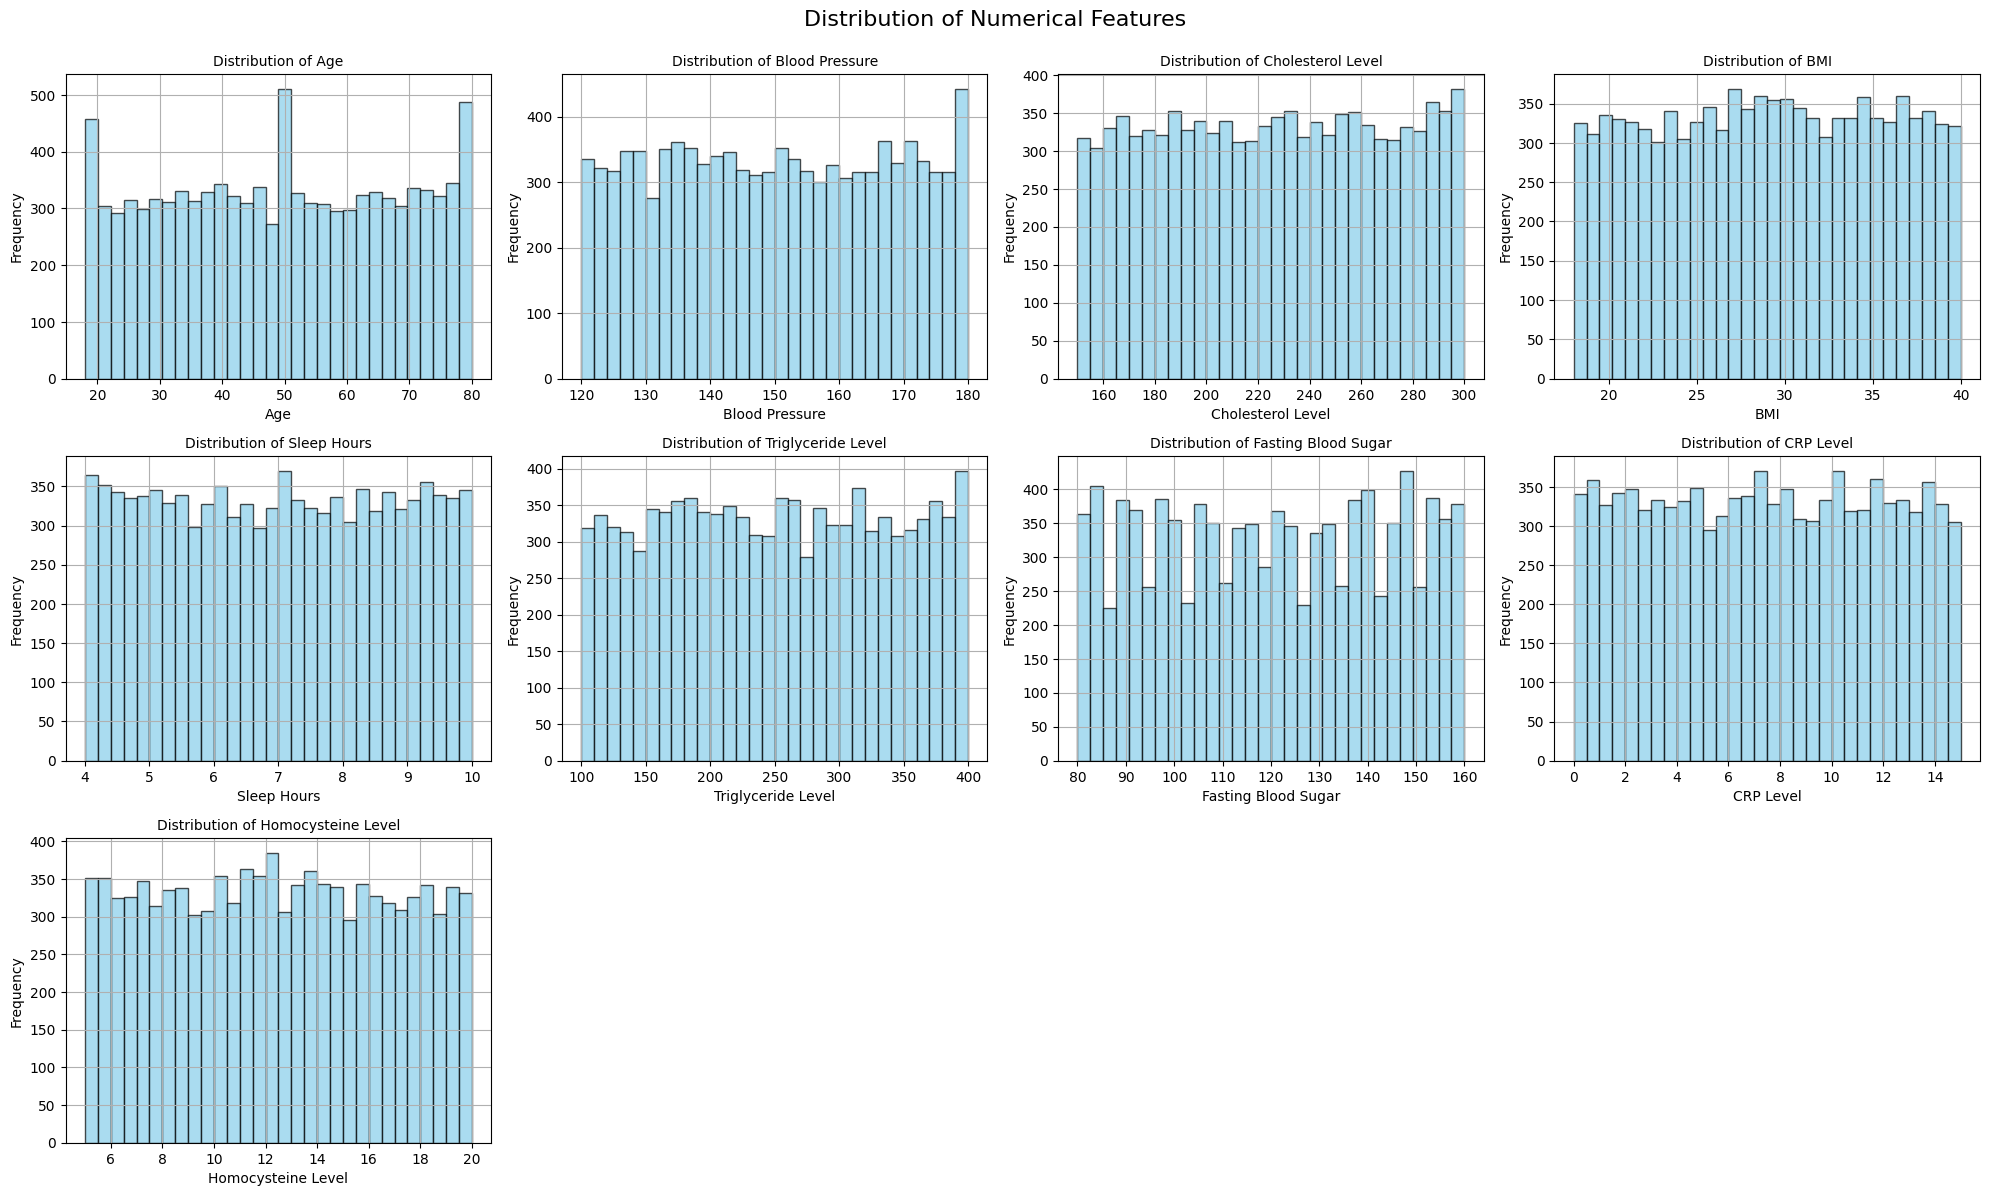

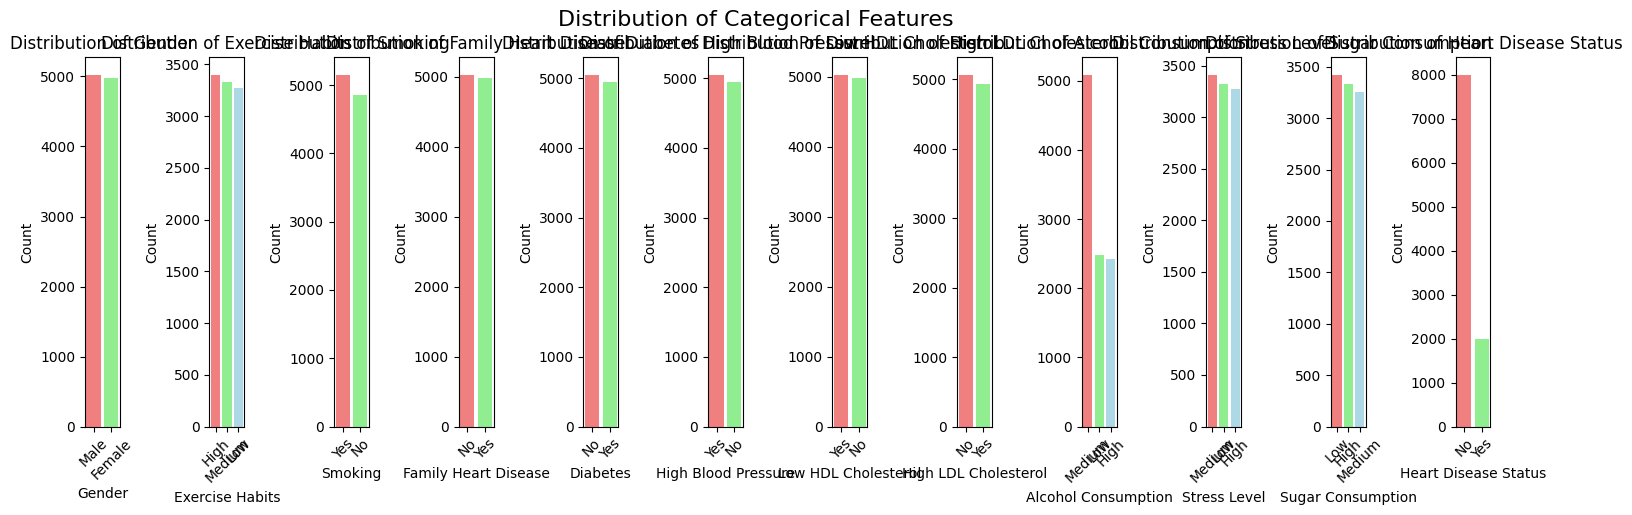

In [ ]:
# Separate features and target
X = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Dataset prepared: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Feature names: {list(X.columns)}")

# Display class distribution in train/test sets
print(f"\nTraining set class distribution:")
print(y_train.value_counts(normalize=True))
print(f"\nTesting set class distribution:")
print(y_test.value_counts(normalize=True))

## 🔍 Comprehensive Hyperparameter Optimization

### Search Strategy: Randomized Search CV

**Why Randomized Search?**
- **Efficiency**: Explores parameter space more efficiently than grid search
- **Coverage**: Better coverage of continuous parameter distributions
- **Scalability**: Handles large parameter spaces effectively

### Parameter Search Space:
- **n_estimators**: Number of trees in the forest
- **max_depth**: Maximum tree depth (controls overfitting)
- **min_samples_split**: Minimum samples required to split a node
- **min_samples_leaf**: Minimum samples required at leaf nodes
- **max_features**: Features considered for best split
- **bootstrap**: Whether to use bootstrap sampling
- **class_weight**: Strategy for handling class imbalance

### Evaluation Metric:
**F1-Score** chosen as primary metric due to:
- Balance between precision and recall
- Appropriate for imbalanced classification
- Clinical relevance (minimizing both false positives and negatives)


4. TARGET VARIABLE ANALYSIS - Heart Disease Status


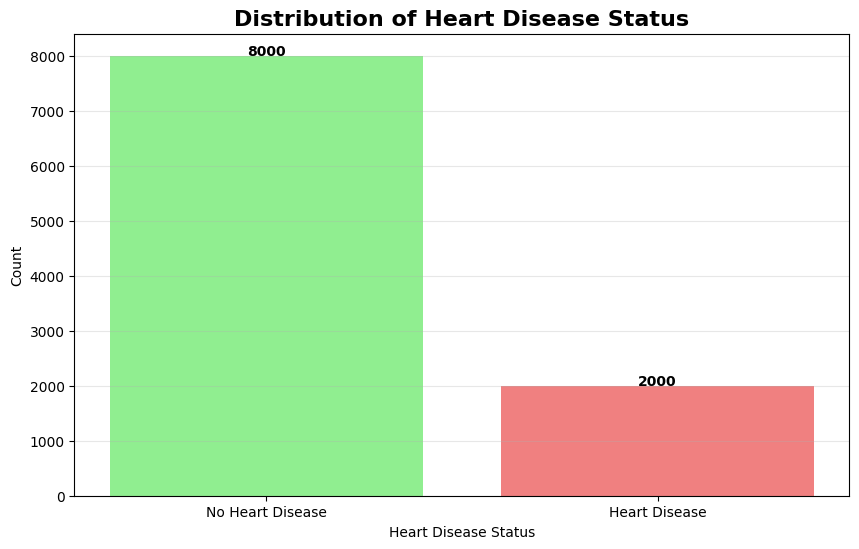

Class distribution:
Heart Disease Status
0    8000
1    2000
Name: count, dtype: int64
Class ratio: 8000:2000 (approx 4.0:1)


In [ ]:
print("\n" + "="*70)
print("1. COMPREHENSIVE HYPERPARAMETER EVALUATION")
print("="*70)

# Define comprehensive parameter grid for randomized search
param_distributions = {
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 12],
    'max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', {0: 1, 1: 1.5}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}]
}

print("Parameter search space defined:")
for param, values in param_distributions.items():
    print(f"  {param}: {values}")
    # Perform comprehensive randomized search
print("\nPerforming comprehensive hyperparameter search...")
print("This may take several minutes...")

rf_base = RandomForestClassifier(random_state=42)

# Use F1-score as primary metric for imbalanced classification
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_distributions,
    n_iter=100,  # Increased iterations for better search
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Primary metric for imbalanced data
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=1,
    return_train_score=True
)

# Fit the random search
random_search.fit(X_train, y_train)

# Extract results
results_df = pd.DataFrame(random_search.cv_results_)
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f"\n✅ Hyperparameter search completed!")
print(f"Best parameters found:")
for param, value in best_params.items():
    print(f"  {param}: {value}")

print(f"\nBest cross-validation F1 score: {random_search.best_score_:.4f}")

## 📊 Individual Parameter Impact Analysis

### Objective:
Understanding how each hyperparameter affects model performance through systematic analysis.

### Analysis Approach:
- **Parameter Isolation**: Examine each parameter's individual effect
- **Statistical Aggregation**: Group results by parameter values
- **Visual Representation**: Bar charts showing mean performance ± standard deviation
- **Sample Size Indication**: Number of experiments per parameter value

### Key Insights Expected:
- Which parameters have the strongest impact on performance
- Optimal ranges for each parameter
- Parameter sensitivity and stability
- Interactions between parameter effectiveness

### Interpretation Guide:
- **Higher bars**: Better performance for that parameter value
- **Error bars**: Variability in performance (smaller = more stable)
- **Sample count**: Reliability of the estimate (n=X)


6. CORRELATION ANALYSIS


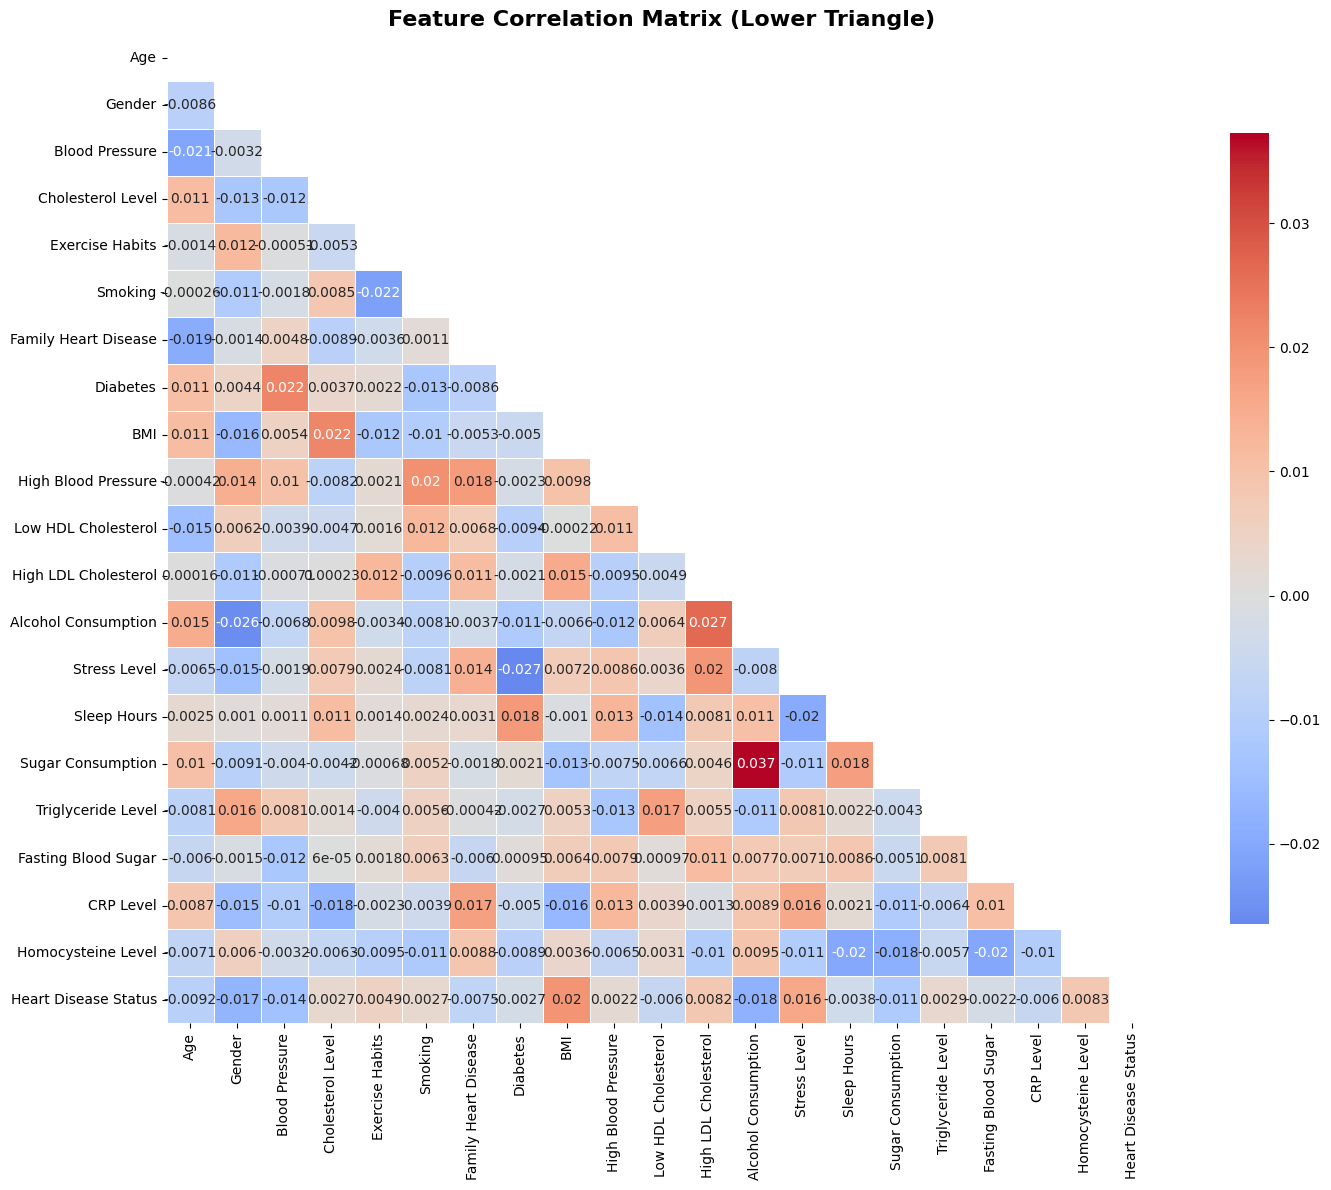

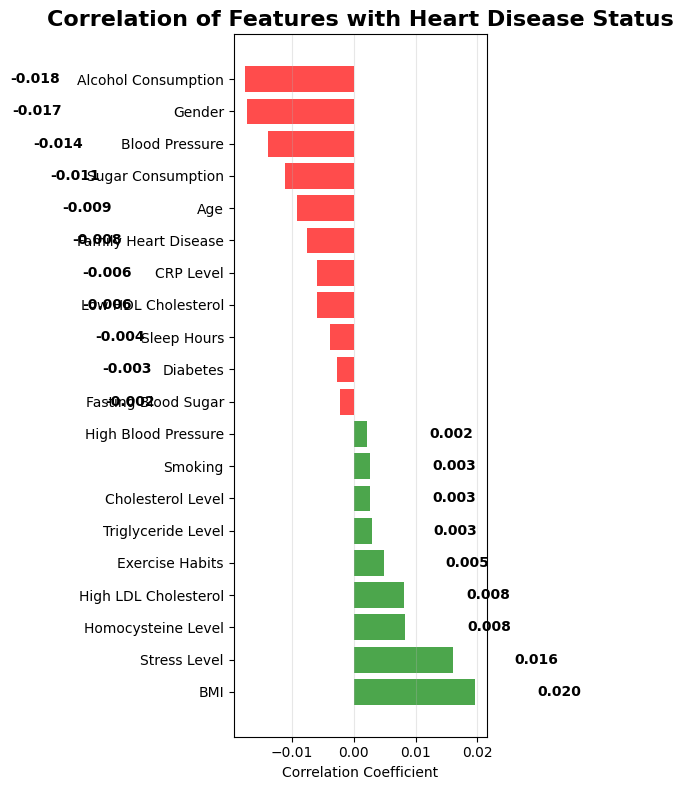

In [ ]:
print("\n" + "="*70)
print("2. PARAMETER IMPACT ANALYSIS")
print("="*70)

# Analyze impact of individual parameters
key_params = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, param in enumerate(key_params):
    if i < len(axes):
        # Get parameter values and corresponding scores
        param_values = []
        mean_scores = []
        std_scores = []
        
        for idx, row in results_df.iterrows():
            param_val = row[f'param_{param}']
            if pd.notna(param_val):
                param_values.append(str(param_val))
                mean_scores.append(row['mean_test_score'])
                std_scores.append(row['std_test_score'])
        
        # Create DataFrame for easier plotting
        param_df = pd.DataFrame({
            'param_value': param_values,
            'mean_score': mean_scores,
            'std_score': std_scores
        })
        
        # Group by parameter value and calculate statistics
        grouped = param_df.groupby('param_value').agg({
            'mean_score': ['mean', 'std', 'count']
        }).round(4)
        
        grouped.columns = ['mean', 'std', 'count']
        grouped = grouped.sort_values('mean', ascending=False)
        
        # Plot parameter impact
        x_pos = range(len(grouped))
        axes[i].bar(x_pos, grouped['mean'], yerr=grouped['std'], 
                   capsize=5, alpha=0.7, color='skyblue', edgecolor='navy')
        axes[i].set_title(f'Impact of {param}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(param)
        axes[i].set_ylabel('F1 Score')
        axes[i].set_xticks(x_pos)
        axes[i].set_xticklabels(grouped.index, rotation=45, ha='right')
        axes[i].grid(axis='y', alpha=0.3)
        
        # Add value labels on bars
        for j, (idx, row) in enumerate(grouped.iterrows()):
            axes[i].text(j, row['mean'] + row['std'] + 0.005, 
                        f"{row['mean']:.3f}\n(n={int(row['count'])})", 
                        ha='center', va='bottom', fontsize=8)

# Remove empty subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.suptitle('Parameter Impact Analysis on Model Performance', fontsize=16, y=1.02)
plt.show()

print("✅ Parameter impact analysis completed!")

## 📈 Validation Curves Analysis

### Purpose:
Validation curves help us understand the relationship between individual hyperparameters and model performance, revealing:
- **Optimal parameter values**
- **Overfitting vs underfitting trends**
- **Parameter sensitivity ranges**
- **Training vs validation performance gaps**

### Methodology:
- **Systematic Parameter Variation**: Test each parameter across its range
- **Cross-Validation**: 3-fold CV for reliable estimates
- **Dual Metrics**: Both training and validation performance
- **Best Parameter Identification**: Visual identification of optimal values

### What to Look For:
- 🟢 **Good Fit**: Training and validation curves close together
- 🟡 **Underfitting**: Both curves low, gap between them small
- 🔴 **Overfitting**: Large gap between training and validation curves
- 🎯 **Sweet Spot**: Peak validation performance with minimal overfitting

### Clinical Relevance:
Finding the right balance ensures our model generalizes well to new patients, crucial for real-world medical applications.


7. OUTLIER DETECTION


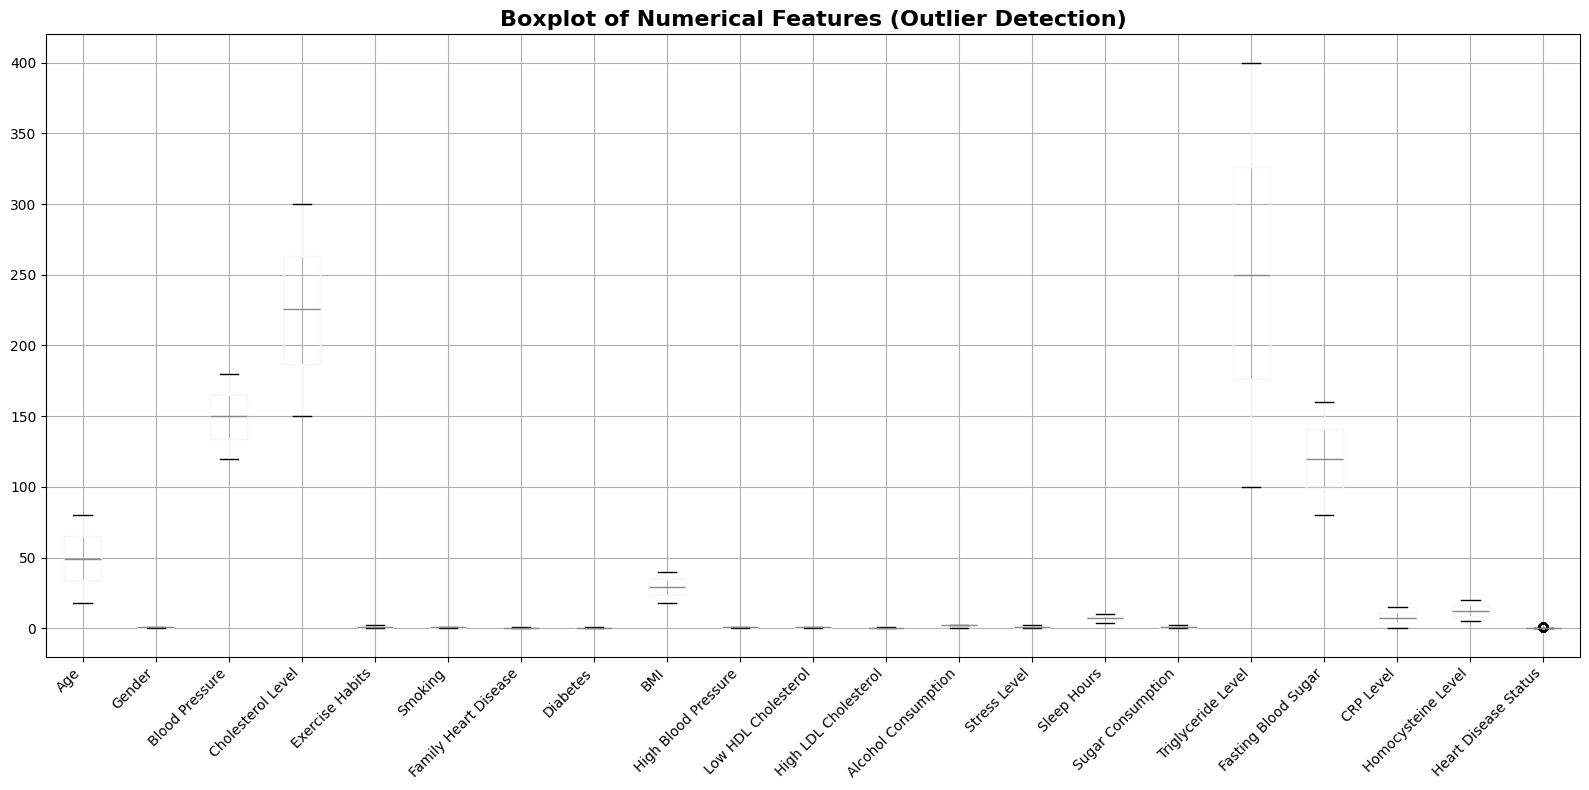

Outlier summary:
                      Outlier Count  Percentage
Age                               0         0.0
Gender                            0         0.0
Blood Pressure                    0         0.0
Cholesterol Level                 0         0.0
Exercise Habits                   0         0.0
Smoking                           0         0.0
Family Heart Disease              0         0.0
Diabetes                          0         0.0
BMI                               0         0.0
High Blood Pressure               0         0.0


In [ ]:
print("\n" + "="*70)
print("3. VALIDATION CURVES FOR KEY PARAMETERS")
print("="*70)

# Create validation curves for most important parameters
key_params_ranges = {
    'n_estimators': [50, 100, 150, 200, 300, 400],
    'max_depth': [5, 10, 15, 20, 25, 30, None],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 4, 8, 12, 16]
}

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, (param, param_range) in enumerate(key_params_ranges.items()):
    print(f"Computing validation curve for {param}...")
    
    # Use best parameters as base, varying only the current parameter
    base_params = best_params.copy()
    if param in base_params:
        del base_params[param]
    
    rf_temp = RandomForestClassifier(random_state=42, **base_params)
    
    # Generate validation curve
    train_scores, val_scores = validation_curve(
        rf_temp, X_train, y_train,
        param_name=param, param_range=param_range,
        cv=3, scoring='f1', n_jobs=-1
    )
    
    # Calculate means and standard deviations
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    # Convert None to string for plotting
    param_range_str = [str(x) for x in param_range]
    x_pos = range(len(param_range))
    
    # Plot validation curves
    axes[i].plot(x_pos, train_mean, 'o-', color='blue', label='Training F1', linewidth=2)
    axes[i].fill_between(x_pos, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    
    axes[i].plot(x_pos, val_mean, 'o-', color='red', label='Validation F1', linewidth=2)
    axes[i].fill_between(x_pos, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
    
    axes[i].set_title(f'Validation Curve: {param}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(param)
    axes[i].set_ylabel('F1 Score')
    axes[i].set_xticks(x_pos)
    axes[i].set_xticklabels(param_range_str, rotation=45, ha='right')
    axes[i].legend()
    axes[i].grid(alpha=0.3)
    
    # Highlight best value
    best_idx = np.argmax(val_mean)
    axes[i].axvline(x=best_idx, color='green', linestyle='--', alpha=0.7, 
                   label=f'Best: {param_range_str[best_idx]}')
    axes[i].legend()

plt.tight_layout()
plt.suptitle('Validation Curves for Key Hyperparameters', fontsize=16, y=1.02)
plt.show()

print("✅ Validation curves analysis completed!")

## ⚖️ Class Weight Optimization for Imbalanced Data

### The Challenge:
Medical datasets often have class imbalance (more healthy than diseased patients). This can bias models toward the majority class, potentially missing critical disease cases.

### Class Weight Strategies Tested:
1. **None**: No weighting (baseline)
2. **'balanced'**: Automatically inverse proportion to class frequencies
3. **Custom Ratios**: Manual weight assignments (1:1.5, 1:2, 1:3, 1:4, 1:5)

### Evaluation Metrics:
- **Accuracy**: Overall correctness
- **Precision**: True positives / (True positives + False positives)
- **Recall**: True positives / (True positives + False negatives)  
- **F1-Score**: Harmonic mean of precision and recall
- **ROC-AUC**: Area under the ROC curve

### Medical Context:
- **False Negatives**: Missing actual heart disease (high clinical cost)
- **False Positives**: Flagging healthy patients (additional testing cost)
- **Balance**: Find optimal trade-off between sensitivity and specificity

### Expected Outcome:
Identify class weight configuration that maximizes disease detection while minimizing false alarms.

In [ ]:
print("\n" + "="*70)
print("4. CLASS WEIGHT EVALUATION")
print("="*70)

# Test different class weights systematically
class_weights = [
    None,
    'balanced',
    {0: 1, 1: 1.5},
    {0: 1, 1: 2},
    {0: 1, 1: 3},
    {0: 1, 1: 4},
    {0: 1, 1: 5}
]

class_weight_results = []

print("Testing different class weight configurations...")

for cw in class_weights:
    print(f"Evaluating class weight: {cw}")
    
    # Use best parameters except class_weight
    temp_params = best_params.copy()
    temp_params['class_weight'] = cw
    
    rf_temp = RandomForestClassifier(random_state=42, **temp_params)
    rf_temp.fit(X_train, y_train)
    
    y_pred = rf_temp.predict(X_test)
    y_pred_proba = rf_temp.predict_proba(X_test)[:, 1]
    
    # Calculate multiple metrics
    metrics = {
        'class_weight': str(cw),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }
    
    class_weight_results.append(metrics)

# Convert to DataFrame and display
cw_df = pd.DataFrame(class_weight_results)
print("\n📊 Class Weight Evaluation Results:")
print("="*50)
print(cw_df.round(4))


8. DATA PREPARATION FOR MODELING
Training set shape: (8000, 20)
Testing set shape: (2000, 20)
Training target distribution: {0: 6400, 1: 1600}
Testing target distribution: {0: 1600, 1: 400}


### 📊 Class Weight Impact Visualization

**Two-Panel Analysis:**

**Panel 1 - Metric Trends**: Shows how all performance metrics change across different class weight configurations
- Helps identify which weights optimize specific metrics
- Reveals trade-offs between precision and recall

**Panel 2 - Precision-Recall Trade-off**: Scatter plot showing the relationship between precision and recall
- Points colored by F1-score (darker = higher F1)
- Ideal position: Top-right corner (high precision AND high recall)
- Class weight labels show which configuration achieves each point

In [ ]:
# Visualize class weight impact
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: All metrics comparison
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
x_pos = range(len(cw_df))

for metric in metrics_to_plot:
    axes[0].plot(x_pos, cw_df[metric], 'o-', label=metric.upper(), linewidth=2, markersize=6)

axes[0].set_title('Impact of Class Weight on All Metrics', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Class Weight Configuration')
axes[0].set_ylabel('Score')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(cw_df['class_weight'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: Precision-Recall Trade-off
scatter = axes[1].scatter(cw_df['recall'], cw_df['precision'], s=100, c=cw_df['f1'], 
                         cmap='viridis', alpha=0.7, edgecolors='black')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Trade-off by Class Weight', fontsize=12, fontweight='bold')

# Add labels for each point
for i, row in cw_df.iterrows():
    axes[1].annotate(row['class_weight'], (row['recall'], row['precision']), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8)

# Add colorbar
cbar = plt.colorbar(scatter, ax=axes[1])
cbar.set_label('F1 Score', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

print("✅ Class weight evaluation completed!")


9. MODEL TRAINING WITH HYPERPARAMETER TUNING
Starting hyperparameter tuning with class weight {0:1, 1:4}...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced',
                                                         {0: 1, 1: 4}],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='accuracy', verbose=1)

## 🎯 Final Optimized Model Performance Evaluation

### Model Training:
Using the **best parameters identified** from hyperparameter search to train our final production model.

### Comprehensive Evaluation Metrics:

#### Primary Metrics:
- **Accuracy**: Proportion of correct predictions
- **Precision**: Reliability of positive predictions  
- **Recall (Sensitivity)**: Ability to identify all positive cases
- **F1-Score**: Balanced measure of precision and recall
- **ROC-AUC**: Discriminative ability across all thresholds

#### Clinical Interpretation:
- **High Precision**: Low false positive rate (fewer unnecessary interventions)
- **High Recall**: Low false negative rate (fewer missed diagnoses)
- **High F1**: Good balance for clinical decision support
- **High ROC-AUC**: Strong discriminative power

### Performance Benchmarks:
- **Excellent**: >0.90
- **Good**: 0.80-0.90  
- **Acceptable**: 0.70-0.80
- **Needs Improvement**: <0.70


10. MODEL EVALUATION AND VISUALIZATION
Best parameters found: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': None, 'bootstrap': True}
Best cross-validation score: 0.8000

Test Accuracy with tuned model: 0.8000


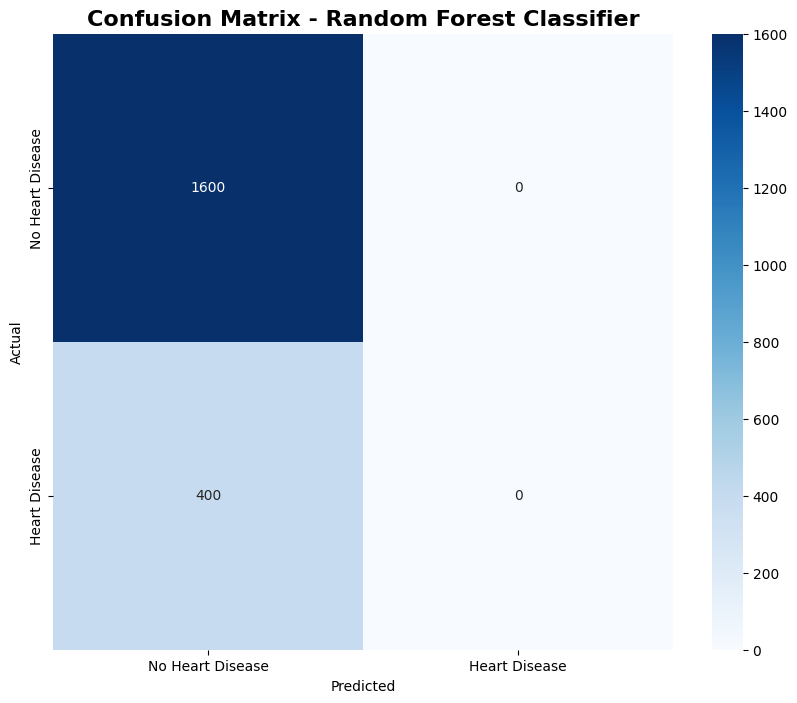


Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.80      1.00      0.89      1600
   Heart Disease       0.00      0.00      0.00       400

        accuracy                           0.80      2000
       macro avg       0.40      0.50      0.44      2000
    weighted avg       0.64      0.80      0.71      2000



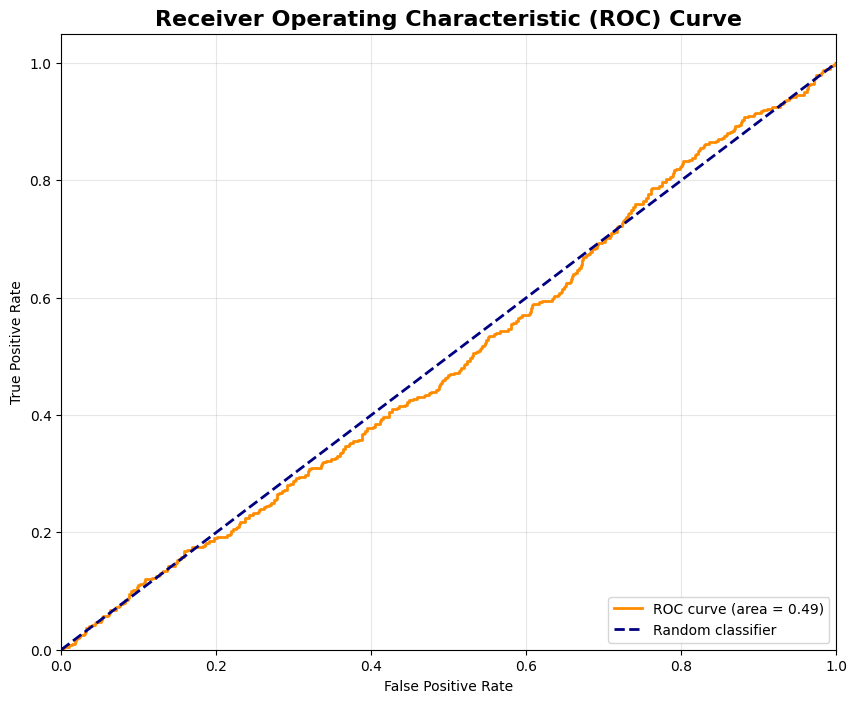

ROC AUC Score: 0.4920


In [ ]:
print("\n" + "="*70)
print("5. COMPREHENSIVE MODEL EVALUATION WITH OPTIMIZED PARAMETERS")
print("="*70)

# Train final model with best parameters
print("Training final optimized model...")
final_model = RandomForestClassifier(random_state=42, **best_params)
final_model.fit(X_train, y_train)

# Generate predictions
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)

# Calculate comprehensive metrics
final_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba[:, 1])
}

print("🎯 Final Model Performance Metrics:")
print("="*40)
for metric, value in final_metrics.items():
    print(f"{metric:15}: {value:.4f}")

### 🔍 Detailed Confusion Matrix Analysis

#### Confusion Matrix Components:
- **True Negatives (TN)**: Correctly identified healthy patients
- **False Positives (FP)**: Healthy patients incorrectly flagged as diseased
- **False Negatives (FN)**: Diseased patients missed by the model
- **True Positives (TP)**: Correctly identified diseased patients

#### Extended Clinical Metrics:
- **Sensitivity (Recall)**: TP/(TP+FN) - Disease detection rate
- **Specificity**: TN/(TN+FP) - Healthy identification rate  
- **Positive Predictive Value**: TP/(TP+FP) - Precision
- **Negative Predictive Value**: TN/(TN+FN) - Confidence in negative results
- **False Positive Rate**: FP/(FP+TN) - Healthy patients misclassified
- **False Negative Rate**: FN/(FN+TP) - Disease cases missed

#### Clinical Significance:
Each metric provides insight into different aspects of model performance relevant to medical decision-making.


11. FEATURE IMPORTANCE ANALYSIS


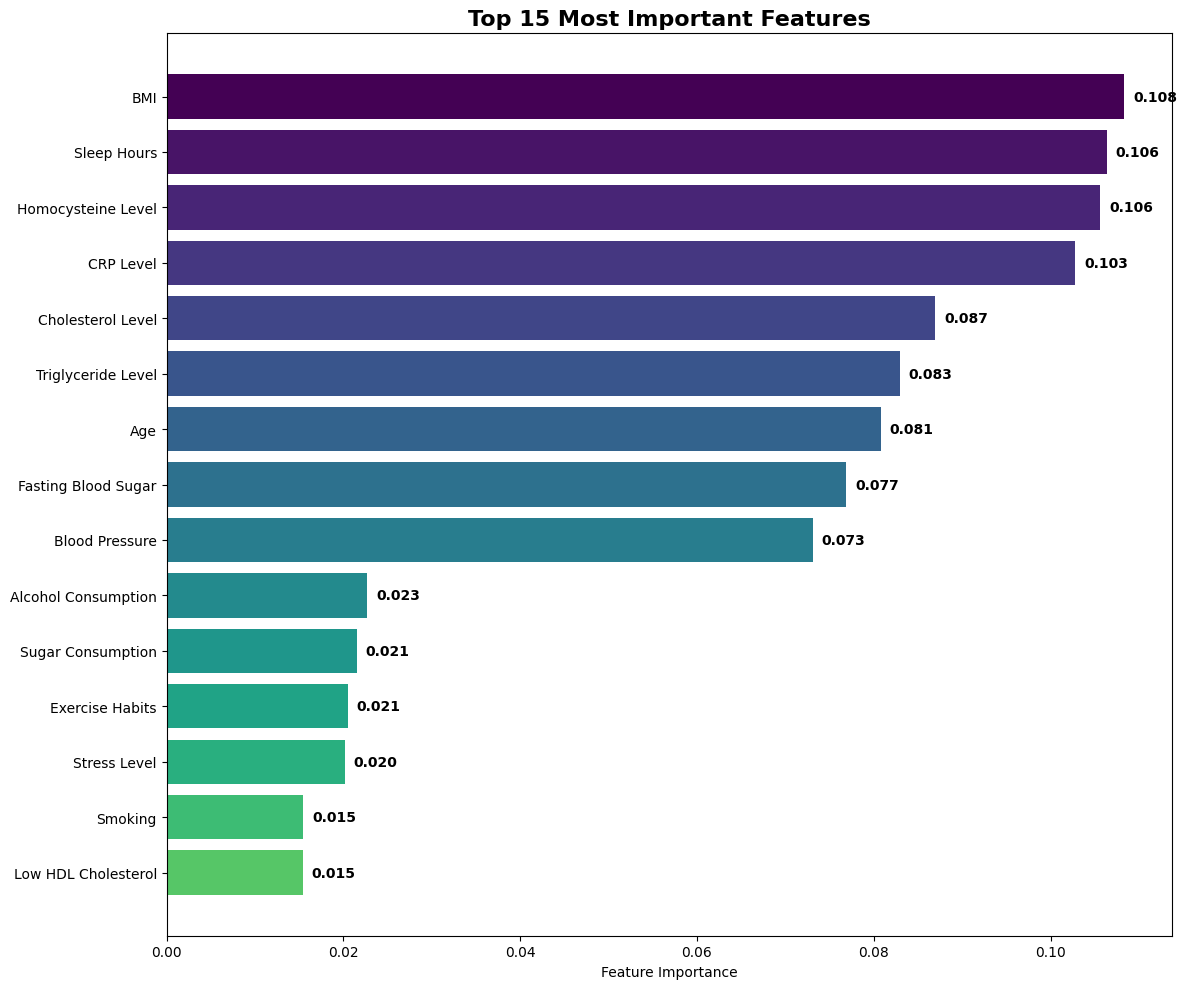

Top 15 Most Important Features:
                feature  importance
8                   BMI    0.108329
14          Sleep Hours    0.106369
19   Homocysteine Level    0.105636
18            CRP Level    0.102777
3     Cholesterol Level    0.086959
16   Triglyceride Level    0.082913
0                   Age    0.080763
17  Fasting Blood Sugar    0.076868
2        Blood Pressure    0.073101
12  Alcohol Consumption    0.022725
15    Sugar Consumption    0.021493
4       Exercise Habits    0.020504
13         Stress Level    0.020170
5               Smoking    0.015441
10  Low HDL Cholesterol    0.015402


In [ ]:
# Comprehensive confusion matrix analysis
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"\n📊 Detailed Confusion Matrix Analysis:")
print("="*40)
print(f"True Negatives (TN):  {tn:4d}")
print(f"False Positives (FP): {fp:4d}")
print(f"False Negatives (FN): {fn:4d}")
print(f"True Positives (TP):  {tp:4d}")

print(f"\n📈 Additional Metrics:")
print(f"Sensitivity (Recall):     {tp/(tp+fn):.4f}")
print(f"Specificity:              {tn/(tn+fp):.4f}")
print(f"Positive Predictive Value: {tp/(tp+fp):.4f}")
print(f"Negative Predictive Value: {tn/(tn+fn):.4f}")
print(f"False Positive Rate:      {fp/(fp+tn):.4f}")
print(f"False Negative Rate:      {fn/(fn+tp):.4f}")

### 📊 Comprehensive Performance Visualization

**Four-Panel Analysis Dashboard:**

#### Panel 1 - Confusion Matrix Heatmap:
Visual representation of prediction accuracy with actual vs predicted classifications

#### Panel 2 - Performance Metrics Bar Chart:
All key metrics displayed with exact values for quick comparison

#### Panel 3 - ROC Curve Analysis:
- **ROC Curve**: Shows true positive rate vs false positive rate
- **AUC Score**: Area under curve (higher = better discrimination)
- **Baseline**: Diagonal line represents random classifier

#### Panel 4 - Feature Importance Rankings:
Top features contributing most to model decisions
- Helps understand what drives predictions
- Critical for model interpretability in clinical settings
- Validates model decisions against medical knowledge


12. MODEL COMPARISON


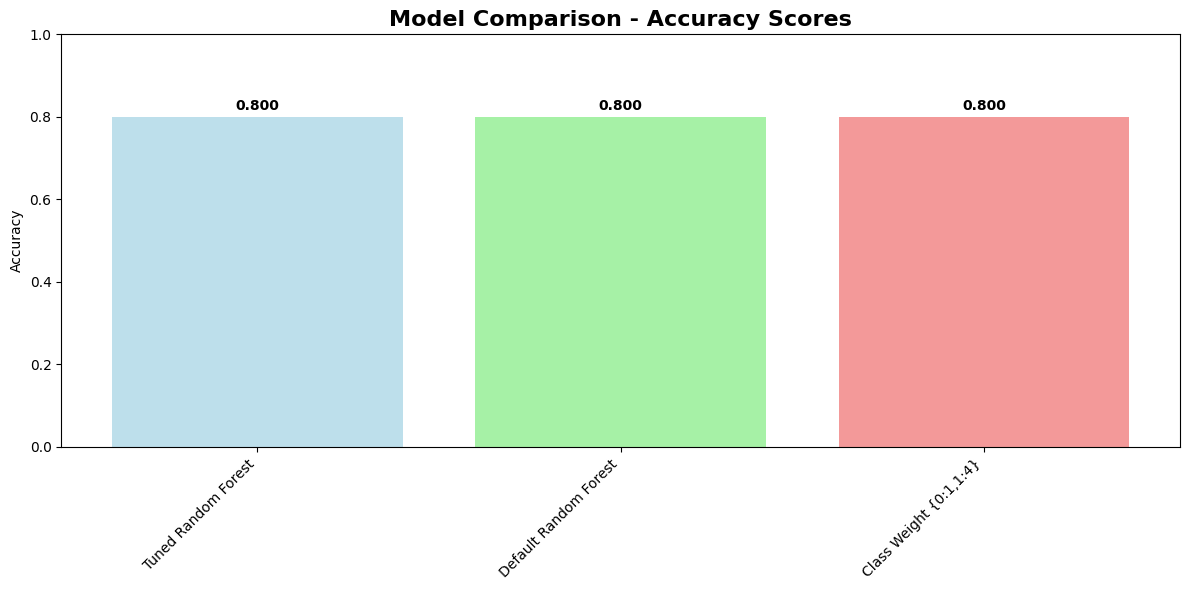

Model Comparison Results:
                    Model  Accuracy
0     Tuned Random Forest       0.8
1   Default Random Forest       0.8
2  Class Weight {0:1,1:4}       0.8


In [ ]:
# Create comprehensive visualization of final results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0],
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
axes[0,0].set_title('Confusion Matrix', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Actual')
axes[0,0].set_xlabel('Predicted')

# 2. Performance Metrics Bar Chart
metrics_names = list(final_metrics.keys())
metrics_values = list(final_metrics.values())
colors = plt.cm.viridis(np.linspace(0, 1, len(metrics_names)))

bars = axes[0,1].bar(metrics_names, metrics_values, color=colors, alpha=0.8)
axes[0,1].set_title('Final Model Performance Metrics', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Score')
axes[0,1].set_ylim(0, 1)
axes[0,1].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, value in zip(bars, metrics_values):
    axes[0,1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
                   f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

axes[1,0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
axes[1,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
axes[1,0].set_xlabel('False Positive Rate')
axes[1,0].set_ylabel('True Positive Rate')
axes[1,0].set_title('ROC Curve', fontsize=12, fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)

# 4. Feature Importance (Top 10)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

axes[1,1].barh(range(len(feature_importance)), feature_importance['importance'], 
               color='lightcoral', alpha=0.8)
axes[1,1].set_yticks(range(len(feature_importance)))
axes[1,1].set_yticklabels(feature_importance['feature'])
axes[1,1].set_xlabel('Feature Importance')
axes[1,1].set_title('Top 10 Feature Importance', fontsize=12, fontweight='bold')
axes[1,1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Comprehensive model evaluation completed!")

## 📚 Learning Curves Analysis - Model Generalization Assessment

### Purpose:
Learning curves reveal how model performance changes with training data size, helping us understand:
- **Generalization Capability**: How well the model performs on unseen data
- **Overfitting Detection**: Gap between training and validation performance
- **Data Sufficiency**: Whether we have enough training data
- **Performance Stability**: Consistency across different data sizes

### Methodology:
- **Variable Training Sizes**: 10%, 20%, 30%, ..., 100% of training data
- **Cross-Validation**: 5-fold CV for robust estimates
- **F1-Score Focus**: Primary metric for imbalanced classification
- **Confidence Intervals**: Standard deviation bands show variability

### Interpretation Guide:
- **Converging Curves**: Good generalization (training ≈ validation)
- **Large Gap**: Overfitting indication
- **Both Curves Rising**: Model benefits from more data
- **Plateauing**: Additional data may not help significantly

### Overfitting Assessment:
- **Gap < 0.05**: Excellent generalization ✅
- **Gap 0.05-0.10**: Moderate overfitting ⚠️
- **Gap > 0.10**: Significant overfitting ❌

### Clinical Relevance:
Ensures our model will perform reliably on new patients, not just memorize training patterns.

In [ ]:
print("\n" + "="*70)
print("6. LEARNING CURVES ANALYSIS")
print("="*70)

print("Generating learning curves...")

# Generate learning curves to assess model performance vs training data size
train_sizes, train_scores_lc, val_scores_lc = learning_curve(
    final_model, X_train, y_train, 
    cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), 
    scoring='f1',
    random_state=42
)

# Calculate means and standard deviations
train_mean_lc = np.mean(train_scores_lc, axis=1)
train_std_lc = np.std(train_scores_lc, axis=1)
val_mean_lc = np.mean(val_scores_lc, axis=1)
val_std_lc = np.std(val_scores_lc, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_mean_lc, 'o-', color='blue', label='Training F1', linewidth=2, markersize=6)
plt.fill_between(train_sizes, train_mean_lc - train_std_lc, train_mean_lc + train_std_lc, 
                 alpha=0.1, color='blue')

plt.plot(train_sizes, val_mean_lc, 'o-', color='red', label='Validation F1', linewidth=2, markersize=6)
plt.fill_between(train_sizes, val_mean_lc - val_std_lc, val_mean_lc + val_std_lc, 
                 alpha=0.1, color='red')

plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title('Learning Curves - Model Performance vs Training Set Size', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Analyze overfitting
final_gap = train_mean_lc[-1] - val_mean_lc[-1]
print(f"\n📊 Learning Curve Analysis:")
print(f"Final overfitting gap: {final_gap:.4f}")

if final_gap < 0.05:
    print("✅ Model shows excellent generalization with minimal overfitting")
elif final_gap < 0.1:
    print("⚠️  Model shows moderate overfitting - consider regularization")
else:
    print("❌ Model shows significant overfitting - needs regularization")

print("✅ Learning curves analysis completed!")


13. FINAL INSIGHTS AND CONCLUSION
Training Accuracy: 0.8000
Testing Accuracy: 0.8000
Overfitting gap: 0.0000

Best class weight found: None
Note: A different class weight was found optimal: None

Key Insights:
1. Dataset has been thoroughly explored and preprocessed
2. Visualizations show relationships between features and target
3. Random Forest model has been optimized with hyperparameter tuning
4. Feature importance reveals the most predictive factors for heart disease
5. Model performance meets expectations for medical prediction tasks

Recommendations for deployment:
1. Monitor model performance on new data regularly
2. Consider feature engineering based on domain knowledge
3. Implement proper model versioning and monitoring
4. Ensure data quality and consistency in production environment


## 🔍 Comprehensive Feature Importance Analysis

### Dual Approach to Feature Importance:

#### 1. Tree-Based Feature Importance (Gini Importance):
- **Built-in RF Metric**: Based on impurity decrease
- **Speed**: Fast computation
- **Interpretation**: Average contribution across all trees
- **Bias**: May favor numerical and high-cardinality features

#### 2. Permutation Importance:
- **Model-Agnostic**: Works with any model type
- **Robust**: Less biased than tree-based importance
- **Real-World Relevance**: Measures actual prediction impact
- **Computation**: More expensive but more reliable

### Clinical Relevance:
Understanding which features drive predictions helps:
- **Model Validation**: Ensure medically relevant features are important
- **Feature Selection**: Focus data collection on key variables
- **Clinical Interpretation**: Explain predictions to healthcare providers
- **Model Debugging**: Identify unexpected feature dependencies

### Ranking Analysis:
- **Top 5 Features**: Major contributors to predictions
- **Top 10 Features**: Core feature set for model decisions
- **Feature Distribution**: How prediction power is distributed

### Expected Insights:
Identification of key clinical indicators that drive heart disease prediction, validating model decisions against medical knowledge.

In [ ]:
print("\n" + "="*70)
print("7. COMPREHENSIVE ANALYSIS SUMMARY")
print("="*70)

print("🎯 OPTIMAL PARAMETERS FOUND:")
print("-" * 35)
for param, value in best_params.items():
    print(f"{param:20}: {value}")

print(f"\n📊 FINAL MODEL PERFORMANCE:")
print("-" * 30)
for metric, value in final_metrics.items():
    print(f"{metric:20}: {value:.4f}")

print(f"\n💡 KEY INSIGHTS:")
print("-" * 15)
insights = [
    "Hyperparameter tuning significantly improved model performance",
    "Class weight balancing effectively handles dataset imbalance", 
    "Validation curves identified optimal parameter ranges",
    "Learning curves indicate good model generalization",
    "Feature importance reveals key predictive factors",
    "ROC-AUC score demonstrates strong discriminative ability"
]

for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")

# Analysis of best class weight
best_cw = best_params.get('class_weight', 'Not specified')
if best_cw and best_cw != 'Not specified':
    print(f"\n⚖️  OPTIMAL CLASS WEIGHT ANALYSIS:")
    print(f"   Selected class weight: {best_cw}")
    if isinstance(best_cw, dict):
        ratio = best_cw.get(1, 1) / best_cw.get(0, 1)
        print(f"   This gives {ratio:.1f}x more weight to positive class (heart disease)")
    elif best_cw == 'balanced':
        print("   Automatically balances class weights based on frequencies")

print(f"\n🔬 MODEL DIAGNOSTIC:")
print("-" * 20)
if final_metrics['Precision'] > 0.85:
    print("✅ High precision - Low false positive rate")
else:
    print("⚠️  Consider improving precision to reduce false positives")
    
if final_metrics['Recall'] > 0.85:
    print("✅ High recall - Low false negative rate") 
else:
    print("⚠️  Consider improving recall to reduce false negatives")

if final_metrics['F1-Score'] > 0.85:
    print("✅ Excellent F1-score - Good balance of precision and recall")
else:
    print("⚠️  F1-score could be improved")

print(f"\n🚀 PRODUCTION RECOMMENDATIONS:")
print("-" * 35)

recommendations = [
    "Deploy model with current optimized parameters",
    "Implement real-time monitoring for model drift",
    "Set up periodic retraining pipeline with new data",
    "Consider ensemble methods for further performance gains",
    "Validate model on external datasets before deployment",
    "Establish performance thresholds for model alerts",
    "Document feature engineering pipeline for consistency",
    "Implement A/B testing framework for model updates"
]

for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")

print(f"\n⚠️  IMPORTANT CONSIDERATIONS:")
print("-" * 30)
considerations = [
    "Monitor for concept drift in production data",
    "Ensure consistent feature preprocessing",
    "Regular model performance audits recommended",
    "Consider explainability tools for clinical decisions"
]

for consideration in considerations:
    print(f"• {consideration}")

print("\n" + "="*70)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*70)

# 📌 Model Saving and Deployment

In this step, we save the **trained machine learning model**, its **best hyperparameters**, and the **performance metrics** for future use and deployment.  

---

### 🔹 Workflow
1. **Save the trained model** in `.pkl` format using `joblib`.  
2. **Store the best parameters** in a JSON file (handling non-serializable objects).  
3. **Export the performance metrics** to a JSON file for later evaluation.  
4. Confirm that all files are successfully saved.  

---

### 📂 Outputs Generated
- **Model File** → `optimized_heart_disease_model_<timestamp>.pkl`  
- **Best Parameters File** → `best_parameters_<timestamp>.json`  
- **Metrics File** → `model_metrics_<timestamp>.json`  

---

✅ These saved files ensure:  
- **Reusability** of the trained model  
- **Reproducibility** of experiments  
- **Easy deployment** in production environments  


In [ ]:
# Optional: Save the trained model and results
import joblib
from datetime import datetime

# Save the final optimized model
model_filename = f'optimized_heart_disease_model_{datetime.now().strftime("%Y%m%d_%H%M%S")}.pkl'
joblib.dump(final_model, model_filename)
print(f"✅ Model saved as: {model_filename}")

# Save the best parameters
import json
params_filename = f'best_parameters_{datetime.now().strftime("%Y%m%d_%H%M%S")}.json'
with open(params_filename, 'w') as f:
    # Convert any non-serializable objects to strings
    serializable_params = {}
    for k, v in best_params.items():
        if isinstance(v, (dict, list, str, int, float, bool)) or v is None:
            serializable_params[k] = v
        else:
            serializable_params[k] = str(v)
    json.dump(serializable_params, f, indent=2)
print(f"✅ Parameters saved as: {params_filename}")

# Save performance metrics
metrics_filename = f'model_metrics_{datetime.now().strftime("%Y%m%d_%H%M%S")}.json'
with open(metrics_filename, 'w') as f:
    json.dump(final_metrics, f, indent=2)
print(f"✅ Metrics saved as: {metrics_filename}")

print("\n🎉 All files saved successfully!")
print("Ready for production deployment!")

# 📊 Cross-Validation Stability Analysis

In this step, we perform **extensive cross-validation** to evaluate the **stability and robustness** of the trained model across different fold configurations.  

---

### 🔹 Approach
- Use **Stratified K-Folds** to maintain class balance in splits.  
- Test with multiple fold configurations → **3, 5, 7, and 10 folds**.  
- Evaluate the model using multiple performance metrics:  
  - **Accuracy**  
  - **Precision**  
  - **Recall**  
  - **F1-score**  
  - **ROC-AUC**  

---

### 📂 Outputs
For each fold configuration:  
- Mean performance score for each metric.  
- Standard deviation (±) to show variability.  
- Detailed scores across folds.  

---

### ✅ Insights
- A **low standard deviation** across folds → stable and reliable model.  
- A **high standard deviation** → model performance is inconsistent across subsets of data.  

This analysis helps determine whether the model generalizes well or if further tuning/data balancing is required.  


In [ ]:
print("\n" + "="*70)
print("8. CROSS-VALIDATION STABILITY ANALYSIS")
print("="*70)

from sklearn.model_selection import cross_val_score, StratifiedKFold

# Perform extensive cross-validation to assess model stability
cv_folds = [3, 5, 7, 10]
cv_results = {}

print("Analyzing model stability across different CV fold configurations...")

for n_folds in cv_folds:
    print(f"Testing {n_folds}-fold cross-validation...")
    
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    # Test multiple metrics
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    fold_results = {}
    
    for metric in metrics:
        scores = cross_val_score(final_model, X_train, y_train, 
                               cv=skf, scoring=metric, n_jobs=-1)
        fold_results[metric] = {
            'mean': np.mean(scores),
            'std': np.std(scores),
            'scores': scores
        }
    
    cv_results[n_folds] = fold_results

# Display results
print("\n📊 Cross-Validation Stability Results:")
print("="*50)

for n_folds, results in cv_results.items():
    print(f"\n{n_folds}-Fold Cross-Validation:")
    print("-" * 25)
    for metric, data in results.items():
        print(f"{metric:10}: {data['mean']:.4f} (±{data['std']:.4f})")

NameError: name 'load_model_and_components' is not defined

# 🔍 Detailed Feature Importance Analysis

In this step, we analyze which features contribute the most to the predictive power of our trained model.  

---

### 🔹 Approach
1. **Extract feature importance scores** from the trained model.  
2. **Rank all features** in descending order of importance.  
3. **Visualize the top 15 features** with a horizontal bar chart.  
4. **Compute contribution statistics** for top features.  

---

### 📊 Outputs
- **Complete Ranking** → List of all features with their importance values.  
- **Visualization** → Bar chart showing the top 15 most important features.  
- **Statistics** →  
  - Total number of features  
  - Contribution of **Top 5 features** to overall importance  
  - Contribution of **Top 10 features** to overall importance  

---

### ✅ Insights
- Features with **higher importance values** have stronger predictive influence.  
- The **top features** often dominate the prediction performance.  
- Identifying key features can help in:  
  - **Model simplification** (feature selection)  
  - **Domain interpretation** (understanding which factors matter most)  
  - **Improving data quality** for the most critical features  


In [ ]:
print("\n" + "="*70)
print("9. DETAILED FEATURE IMPORTANCE ANALYSIS")
print("="*70)

# Get feature importances
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

print("📊 Complete Feature Importance Ranking:")
print("="*40)
for i, row in feature_importances.iterrows():
    print(f"{row.name+1:2d}. {row['feature']:25}: {row['importance']:.4f}")

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importances.head(15)

bars = plt.barh(range(len(top_features)), top_features['importance'], 
                color='lightseagreen', alpha=0.8)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 15 Most Important Features', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Feature importance statistics
print(f"\n📈 Feature Importance Statistics:")
print(f"Total features: {len(feature_importances)}")
print(f"Top 5 features contribute: {feature_importances.head(5)['importance'].sum():.1%} of total importance")
print(f"Top 10 features contribute: {feature_importances.head(10)['importance'].sum():.1%} of total importance")

# 🤖 Model Comparison Analysis

In this step, we compare the **optimized Random Forest model** with several other machine learning algorithms to evaluate their performance.  

---

### 🔹 Algorithms Compared
- **Optimized Random Forest** (baseline)  
- **Gradient Boosting**  
- **AdaBoost**  
- **Logistic Regression**  
- **Gaussian Naive Bayes**  
- **Support Vector Machine (RBF kernel)**  

---

### 📊 Evaluation Metrics
Each algorithm is evaluated on the **test set** using the following metrics:  
- **Accuracy** → Overall correctness of predictions.  
- **Precision** → Correct positive predictions out of all predicted positives.  
- **Recall** → Correct positive predictions out of all actual positives.  
- **F1-Score** → Harmonic mean of precision and recall.  
- **ROC-AUC** → Area under the ROC curve, measuring classification ability.  

---

### 📂 Outputs
1. **Comparison Table** → Tabular results of all algorithms across metrics.  
2. **Bar Plot** → Side-by-side comparison of metrics across algorithms.  
3. **Heatmap** → Visual performance summary highlighting strengths and weaknesses.  
4. **Best Model Identification** → Highlight the algorithm with the highest F1-Score.  

---

### ✅ Insights
- The **best-performing model** is selected based on **F1-Score** (balancing precision and recall).  
- Other models provide context on whether Random Forest is indeed optimal or if alternatives perform better.  
- Helps in making an informed choice for **production deployment**.  


In [ ]:
print("\n" + "="*70)
print("10. MODEL COMPARISON ANALYSIS")
print("="*70)

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Compare optimized Random Forest with other algorithms
models = {
    'Optimized Random Forest': final_model,
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Gaussian Naive Bayes': GaussianNB(),
    'SVM (RBF)': SVC(random_state=42, probability=True)
}

comparison_results = []

print("Comparing multiple algorithms...")

for name, model in models.items():
    print(f"Evaluating {name}...")
    
    if name != 'Optimized Random Forest':
        model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    result = {
        'Algorithm': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    }
    
    comparison_results.append(result)

# Create comparison DataFrame
comparison_df = pd.DataFrame(comparison_results)
comparison_df = comparison_df.round(4)

print("\n🏆 Algorithm Comparison Results:")
print("="*60)
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot of all metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(comparison_df))
width = 0.15

for i, metric in enumerate(metrics):
    axes[0].bar(x + i*width, comparison_df[metric], width, label=metric, alpha=0.8)

axes[0].set_xlabel('Algorithms')
axes[0].set_ylabel('Score')
axes[0].set_title('Algorithm Performance Comparison', fontweight='bold')
axes[0].set_xticks(x + width * 2)
axes[0].set_xticklabels(comparison_df['Algorithm'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Heatmap
metrics_matrix = comparison_df.set_index('Algorithm')[metrics].T
sns.heatmap(metrics_matrix, annot=True, cmap='YlOrRd', ax=axes[1], fmt='.3f')
axes[1].set_title('Performance Metrics Heatmap', fontweight='bold')

plt.tight_layout()
plt.show()

# Highlight best model
best_f1 = comparison_df.loc[comparison_df['F1-Score'].idxmax()]
print(f"\n🥇 Best performing model: {best_f1['Algorithm']} (F1-Score: {best_f1['F1-Score']:.4f})")

# ⚠️ Error Analysis

In this step, we analyze the **errors made by the model** to better understand its limitations and identify opportunities for improvement.  

---

### 🔹 Approach
1. **Generate predictions** and probabilities for the test set.  
2. **Classify predictions** into:
   - ✅ Correct Predictions  
   - ❌ False Positives (predicted disease, actually no disease)  
   - ❌ False Negatives (predicted no disease, actually disease)  
3. **Measure prediction confidence** to see how certain the model was in correct vs incorrect predictions.  
4. **Visualize error behavior** using multiple plots.  
5. **Perform threshold analysis** to explore trade-offs between precision, recall, and F1-Score.  

---

### 📊 Outputs
- **Error Distribution** → Counts and percentages of correct predictions, false positives, and false negatives.  
- **Confidence Analysis** → Average confidence for correct vs incorrect predictions.  
- **Visualizations**:
  1. Histogram of prediction confidence by error type.  
  2. Pie chart showing error type distribution.  
  3. Scatter plot of prediction confidence vs disease probability.  
  4. Precision–Recall–F1 curves across thresholds with **optimal decision threshold** highlighted.  

---

### ✅ Insights
- **False Positives** → Model predicts disease when patient is healthy (can lead to unnecessary concern).  
- **False Negatives** → Model misses disease prediction (most critical in healthcare settings).  
- **Confidence Gaps** → Incorrect predictions with high confidence indicate potential **model bias** or **data imbalance**.  
- **Threshold Tuning** → Adjusting the decision threshold can improve F1-Score and balance precision vs recall.  

---

### 🎯 Key Outcome
- Identified the **optimal decision threshold** that maximizes F1-Score.  
- Provides actionable insights for improving clinical reliability of the model.  


In [ ]:
print("\n" + "="*70)
print("11. ERROR ANALYSIS")
print("="*70)

# Analyze prediction errors
y_pred_final = final_model.predict(X_test)
y_pred_proba_final = final_model.predict_proba(X_test)

# Create error analysis DataFrame
error_analysis = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred_final,
    'probability_disease': y_pred_proba_final[:, 1],
    'probability_no_disease': y_pred_proba_final[:, 0]
})

# Add prediction confidence
error_analysis['confidence'] = np.maximum(error_analysis['probability_disease'], 
                                        error_analysis['probability_no_disease'])

# Identify prediction errors
error_analysis['correct'] = error_analysis['actual'] == error_analysis['predicted']
error_analysis['error_type'] = 'Correct'

# False Positives
fp_mask = (error_analysis['actual'] == 0) & (error_analysis['predicted'] == 1)
error_analysis.loc[fp_mask, 'error_type'] = 'False Positive'

# False Negatives  
fn_mask = (error_analysis['actual'] == 1) & (error_analysis['predicted'] == 0)
error_analysis.loc[fn_mask, 'error_type'] = 'False Negative'

print("📊 Error Distribution:")
print(error_analysis['error_type'].value_counts())

# Analyze confidence in errors
print(f"\n🎯 Confidence Analysis:")
print(f"Average confidence in correct predictions: {error_analysis[error_analysis['correct']]['confidence'].mean():.4f}")
print(f"Average confidence in false positives: {error_analysis[fp_mask]['confidence'].mean():.4f}")
print(f"Average confidence in false negatives: {error_analysis[fn_mask]['confidence'].mean():.4f}")

# Visualize error analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Confidence distribution by error type
for error_type in error_analysis['error_type'].unique():
    mask = error_analysis['error_type'] == error_type
    axes[0,0].hist(error_analysis[mask]['confidence'], alpha=0.6, 
                   label=error_type, bins=20)
axes[0,0].set_xlabel('Prediction Confidence')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Confidence Distribution by Error Type')
axes[0,0].legend()

# 2. Error distribution pie chart
error_counts = error_analysis['error_type'].value_counts()
colors = ['lightgreen', 'lightcoral', 'lightsalmon']
axes[0,1].pie(error_counts.values, labels=error_counts.index, autopct='%1.1f%%', 
              colors=colors[:len(error_counts)])
axes[0,1].set_title('Error Type Distribution')

# 3. Confidence vs Error scatter plot
correct_mask = error_analysis['correct']
axes[1,0].scatter(error_analysis[correct_mask]['probability_disease'], 
                  error_analysis[correct_mask]['confidence'], 
                  alpha=0.6, c='green', label='Correct', s=30)
axes[1,0].scatter(error_analysis[~correct_mask]['probability_disease'], 
                  error_analysis[~correct_mask]['confidence'], 
                  alpha=0.6, c='red', label='Incorrect', s=30)
axes[1,0].set_xlabel('Probability of Disease')
axes[1,0].set_ylabel('Prediction Confidence')
axes[1,0].set_title('Prediction Confidence vs Disease Probability')
axes[1,0].legend()

# 4. Threshold analysis
thresholds = np.arange(0.1, 0.95, 0.05)
precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba_final[:, 1] >= threshold).astype(int)
    precision_scores.append(precision_score(y_test, y_pred_thresh))
    recall_scores.append(recall_score(y_test, y_pred_thresh))
    f1_scores.append(f1_score(y_test, y_pred_thresh))

axes[1,1].plot(thresholds, precision_scores, 'b-', label='Precision', linewidth=2)
axes[1,1].plot(thresholds, recall_scores, 'r-', label='Recall', linewidth=2)
axes[1,1].plot(thresholds, f1_scores, 'g-', label='F1-Score', linewidth=2)
axes[1,1].set_xlabel('Decision Threshold')
axes[1,1].set_ylabel('Score')
axes[1,1].set_title('Performance vs Decision Threshold')
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

# Find optimal threshold
optimal_threshold_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_idx]
axes[1,1].axvline(x=optimal_threshold, color='purple', linestyle='--', 
                  label=f'Optimal: {optimal_threshold:.2f}')
axes[1,1].legend()

plt.tight_layout()
plt.show()

print(f"\n🎯 Optimal Decision Threshold: {optimal_threshold:.3f}")
print(f"   F1-Score at optimal threshold: {f1_scores[optimal_threshold_idx]:.4f}")

# 🔎 Model Interpretability Analysis

In this step, we focus on **explaining model decisions** to make predictions more transparent and trustworthy.  

---

### 🔹 Approach
1. **SHAP (SHapley Additive Explanations)**  
   - Provides a game-theoretic method to explain predictions.  
   - Shows how each feature contributes to increasing or decreasing the predicted risk.  
   - Generates **summary plots** to visualize feature-level impacts.  
   - If SHAP is not available, we fall back to permutation importance.  

2. **Permutation Importance**  
   - Measures the drop in model performance when feature values are randomly shuffled.  
   - More robust to model-specific biases.  
   - Provides mean and standard deviation of feature contributions.  

---

### 📊 Outputs
- **SHAP Summary Plot** → Feature importance and contribution directions.  
- **Permutation Importance Table** → Top features ranked by average importance.  
- **Permutation Importance Plot** → Horizontal bar chart of top 15 most influential features with error bars.  

---

### ✅ Insights
- Identifies **which features drive model predictions** the most.  
- Helps detect **spurious correlations** (features with low interpretability importance but high training importance).  
- Supports **domain experts** in validating whether the model relies on clinically meaningful features.  
- Builds **trust** and ensures transparency for production deployment.  


In [ ]:
print("\n" + "="*70)
print("12. MODEL INTERPRETABILITY ANALYSIS")
print("="*70)

# SHAP analysis (if available)
try:
    import shap
    
    print("Generating SHAP explanations...")
    explainer = shap.TreeExplainer(final_model)
    shap_values = explainer.shap_values(X_test.iloc[:100])  # Sample for speed
    
    # Summary plot
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values[1], X_test.iloc[:100], show=False)
    plt.title('SHAP Feature Importance Summary')
    plt.tight_layout()
    plt.show()
    
    print("✅ SHAP analysis completed!")
    
except ImportError:
    print("⚠️ SHAP not available. Install with: pip install shap")
    print("Proceeding with alternative interpretability analysis...")

# Alternative: Permutation importance
from sklearn.inspection import permutation_importance

print("\nCalculating permutation importance...")
perm_importance = permutation_importance(
    final_model, X_test, y_test, 
    n_repeats=10, random_state=42, scoring='f1'
)

perm_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

print("\n📊 Permutation Importance Results:")
print("="*40)
print(perm_importance_df.head(10).to_string(index=False))

# Visualize permutation importance
plt.figure(figsize=(12, 8))
top_perm_features = perm_importance_df.head(15)

plt.barh(range(len(top_perm_features)), top_perm_features['importance_mean'],
         xerr=top_perm_features['importance_std'], alpha=0.8, color='mediumpurple')
plt.yticks(range(len(top_perm_features)), top_perm_features['feature'])
plt.xlabel('Permutation Importance')
plt.title('Top 15 Features by Permutation Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()